In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


In [3]:
%reload_ext autoreload

In [4]:
from read_functions import *
from pickle_functions import *

In [5]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'


In [6]:
df_advocate_beers = pd.read_csv(advocate_beers_path, sep=',')
df_advocate_breweries = pd.read_csv(advovate_breweries_path, sep=',')

df_advocate_users = pd.read_csv(advocate_users_path, sep=',')
#df_advocate_ratings = read_txt(advocate_ratings_path)
#df_advocate_reviews = read_txt(advocate_reviews_path)

In [7]:
df_advocate_reviews.text

NameError: name 'df_advocate_reviews' is not defined

In [ ]:
df_advocate_ratings.head()

NameError: name 'df_advocate_ratings' is not defined

In [42]:
df_rate_beer_beers = pd.read_csv(rate_beer_beers, sep=',')
df_rate_beer_breweries = pd.read_csv(rate_beer_breweries, sep=',')
df_rate_beer_users = pd.read_csv(rate_beer_users, sep=',')

In [43]:
df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
df_matched_beer_breweries = pd.read_csv(matched_beer_breweries, sep=',')

df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')
df_matched_beer_users_approx = pd.read_csv(matched_beer_users_approx)
df_matched_beer_users = pd.read_csv(matched_beer_users)
#df_matched_beer_ratings_ba = read_txt(matched_beer_ratings_ba)
#df_matched_beer_ratings_rb = read_txt(matched_beer_ratings_rb)

C:\Users\rosi-\AppData\Local\Temp\ipykernel_18252\2457743781.py:1: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_matched_beer_beers = pd.read_csv(matched_beer_beers, sep=',')
C:\Users\rosi-\AppData\Local\Temp\ipykernel_18252\2457743781.py:4: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_matched_beer_ratings = pd.read_csv(matched_beer_ratings, sep=',')


In [44]:
df_matched_beer_users_approx.head()






,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5,scores
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower,sim
1,1483009200.0,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1484046000.0,Spain,89,442761,MAGICuenca91,magicuenca91,0.9045340337332909
2,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel,1.0000000000000004
3,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138,1.0000000000000004
4,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop,1.0000000000000002


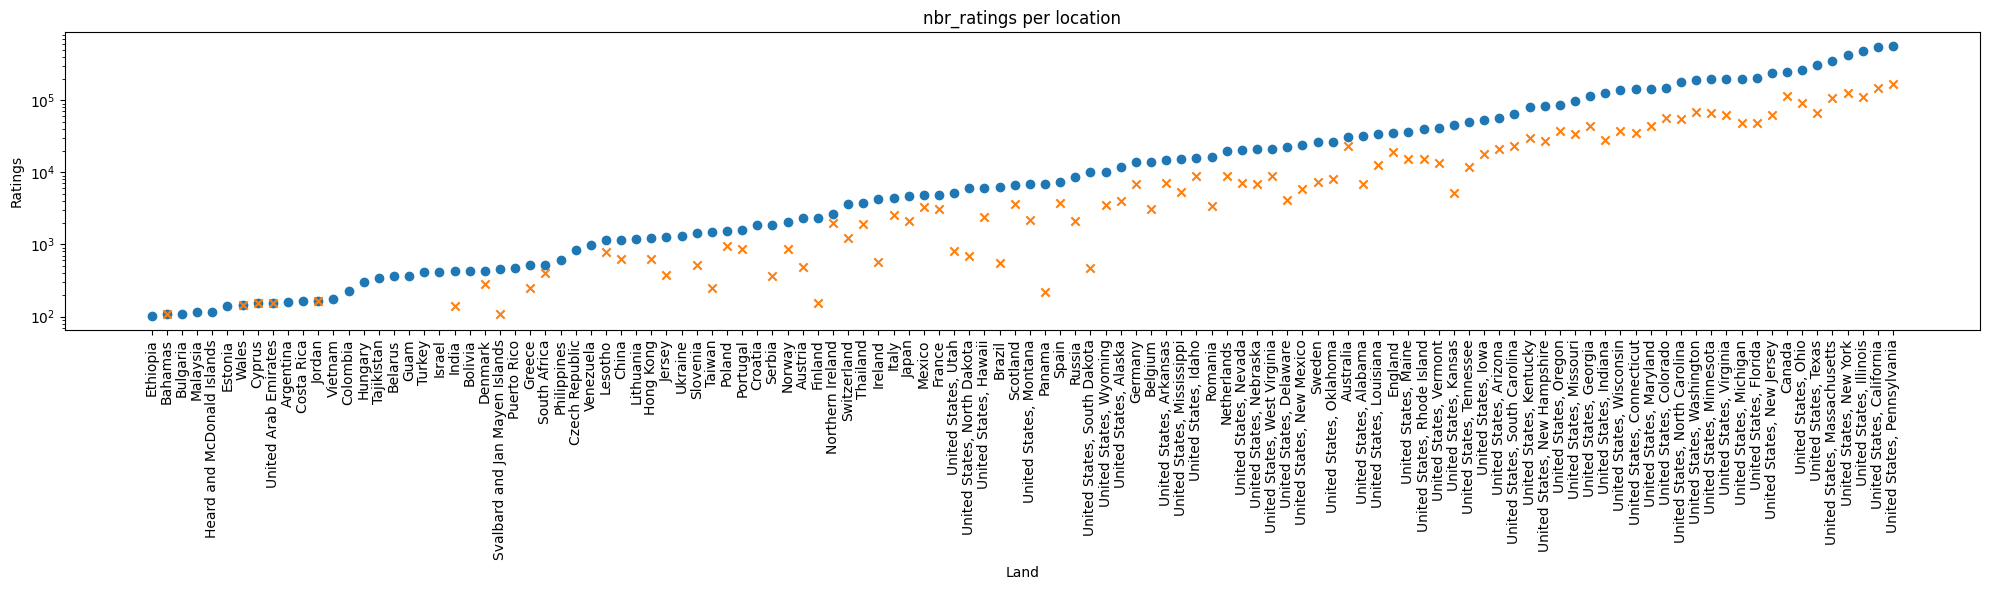

In [45]:



df_advocate_users_r = df_advocate_users.query('nbr_ratings >= 100')
df_advocate_users_re = df_advocate_users.query('nbr_reviews >= 100')
ratings =df_advocate_users_r.groupby('location')['nbr_ratings'].apply(lambda x: x.sum())
reviews =df_advocate_users_re.groupby('location')['nbr_reviews'].apply(lambda x: x.sum())



ratings = ratings.sort_values()
reviews = reviews.sort_values()


plt.figure(figsize=(20, 6)) 
plt.scatter(ratings.index, ratings, label='nbr_ratings', marker='o')


plt.scatter(reviews.index, reviews, label='nbr_reviews', marker='x')
plt.xlabel('Land')
plt.ylabel('Ratings')
plt.semilogy()
plt.title('nbr_ratings per location')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [46]:
#df_matched_beer_beers 
#df_matched_beer_breweries 


df_matched_beer_users_approx.head()
df_matched_beer_ratings= df_matched_beer_ratings.dropna()
df_matched_beer_ratings.info()
#df_matched_beer_users 

<class 'pandas.core.frame.DataFrame'>
Index: 17939 entries, 0 to 21964
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ba      17939 non-null  object
 1   ba.1    17939 non-null  object
 2   ba.2    17939 non-null  object
 3   ba.3    17939 non-null  object
 4   ba.4    17939 non-null  object
 5   ba.5    17939 non-null  object
 6   ba.6    17939 non-null  object
 7   ba.7    17939 non-null  object
 8   ba.8    17939 non-null  object
 9   ba.9    17939 non-null  object
 10  ba.10   17939 non-null  object
 11  ba.11   17939 non-null  object
 12  ba.12   17939 non-null  object
 13  ba.13   17939 non-null  object
 14  ba.14   17939 non-null  object
 15  ba.15   17939 non-null  object
 16  ba.16   17939 non-null  object
 17  rb      17939 non-null  object
 18  rb.1    17939 non-null  object
 19  rb.2    17939 non-null  object
 20  rb.3    17939 non-null  object
 21  rb.4    17939 non-null  object
 22  rb.5    17939 non-null  obj

In [47]:
df_rate_beer_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70174 entries, 0 to 70173
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nbr_ratings  70174 non-null  int64  
 1   user_id      70174 non-null  int64  
 2   user_name    70174 non-null  object 
 3   joined       70144 non-null  float64
 4   location     50592 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


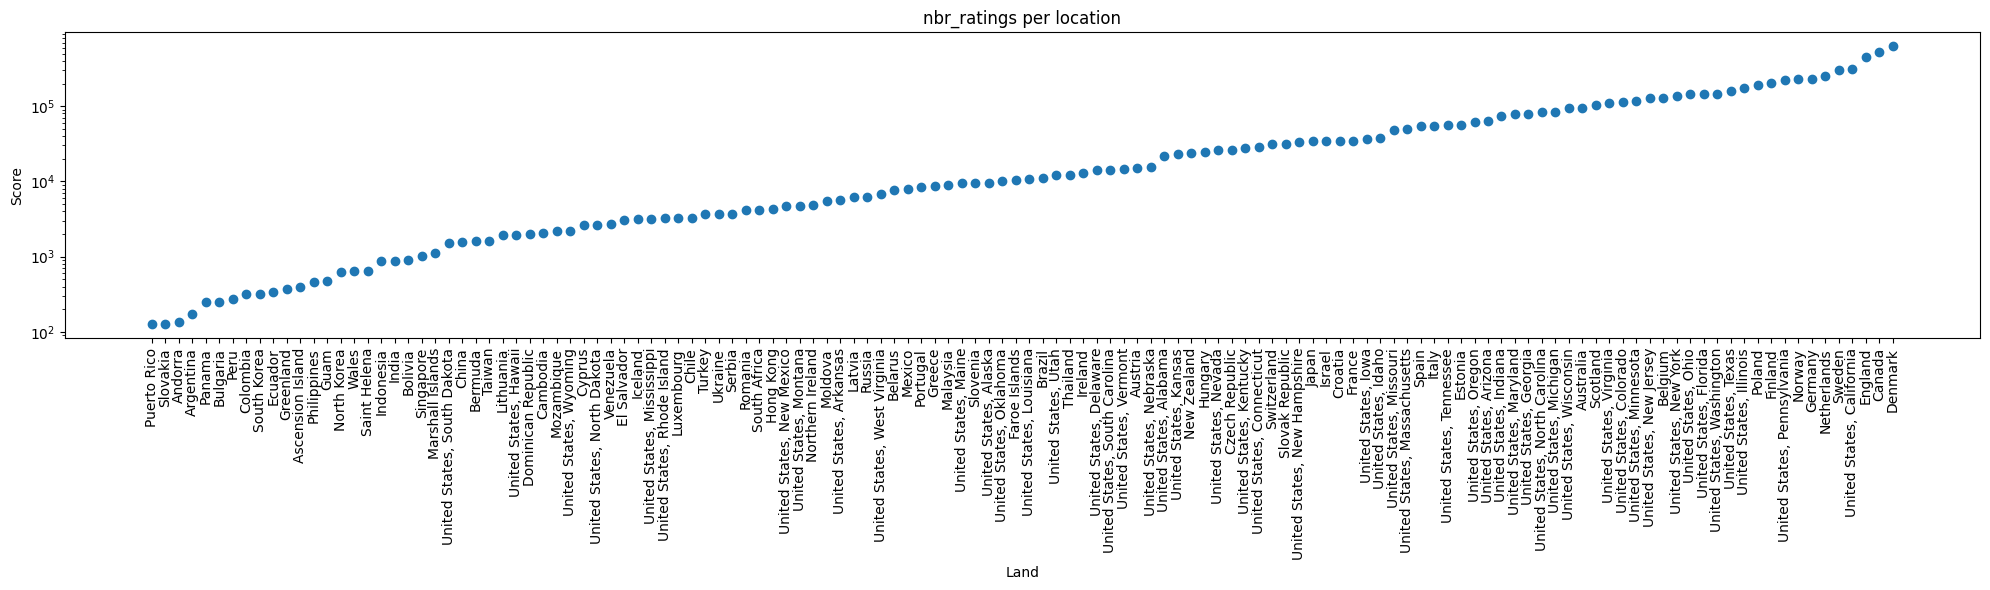

In [48]:
df_rate_beer_users_ra = df_rate_beer_users.query('nbr_ratings >= 100')

ratings1 =df_rate_beer_users_ra.groupby('location')['nbr_ratings'].apply(lambda x: x.sum())



ratings1 = ratings1.sort_values()



plt.figure(figsize=(20, 6)) 
plt.scatter(ratings1.index, ratings1, label='nbr_ratings', marker='o')



plt.xlabel('Land')
plt.ylabel('Score')
plt.semilogy()
plt.title('nbr_ratings per location')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [65]:
df_matched_beer_users = pd.read_csv(matched_beer_users)

In [93]:
df_matched_beer_users.head()

: 

In [ ]:
df_matched_beer_users1 = df_matched_beer_users.drop(df_matched_beer_users.columns[[0, 1 ,3, 4, 5,6,7,8,10,12]], axis=1)
df_matched_beer_users1.columns = df_matched_beer_users1.iloc[0]
df_matched_beer_users1 = df_matched_beer_users1[1:]
df_matched_beer_users1['nbr_ratings'] = df_matched_beer_users1['nbr_ratings'].astype(float)
df_matched_beer_users1.columns.values[0] = 'BA_ratings'
df_matched_beer_users1.columns.values[1] = 'RB_ratings'
#df_matched_beer_users1['new'] = df_matched_beer_users1['BA_ratings']+df_matched_beer_users1['RB_ratings']
df_matched_beer_users1.info()
plt.semilogy()
plt.boxplot(df_matched_beer_users1['new'])



In [57]:
df_matched_beer_users1.

SyntaxError: invalid syntax (3782612994.py, line 1)